In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.8.0+cu126'

In [ ]:
# y = mx + c
weight = 0.9
bias = 0.1

start = 0
stop = 1
step = 0.01
X = torch.arange(start, stop, step)
y = weight * X + bias
X[:10], y[:10]

(tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
         0.0900]),
 tensor([0.1000, 0.1090, 0.1180, 0.1270, 0.1360, 0.1450, 0.1540, 0.1630, 0.1720,
         0.1810]))

In [ ]:
print(X.numel())
print(y.numel())

100
100


In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

In [ ]:
# Create train/test split
# train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
# X_train, y_train = X[:train_split], y[:train_split]
# X_test, y_test = X[train_split:], y[train_split:]

# len(X_train), len(y_train), len(X_test), len(y_test)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [ ]:
X_train.numel(), X_test.numel()

(80, 20)

In [ ]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  plt.figure(figsize=(10, 7))

  #Plot training data in blue
  plt.scatter(train_data, train_labels, c='b', s=4, label = 'Training data')

  #Plot test data in grren
  plt.scatter(test_data, test_labels, c='g', s=4, label='Testing data')

  if predictions is not None:
    #for predicitions in red
    plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')

  #Show the legend
  plt.legend(prop={'size': 14});


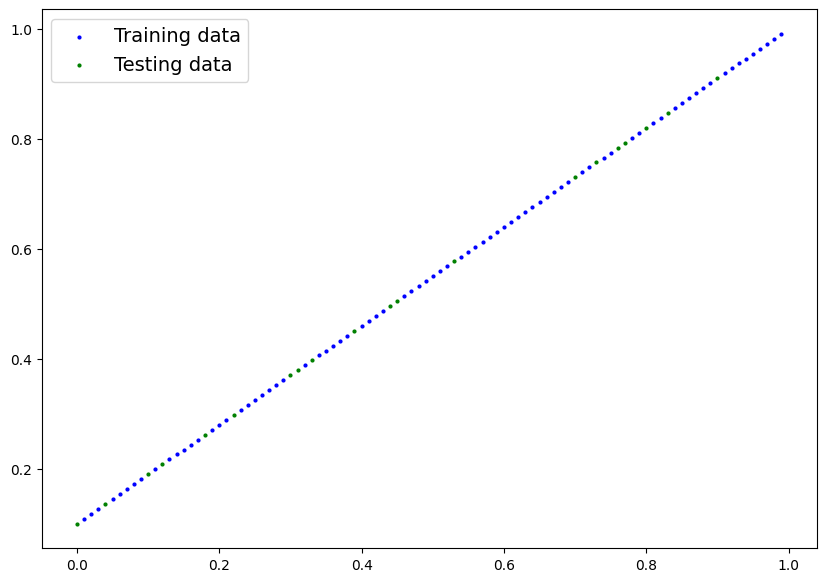

In [ ]:
plot_predictions()

In [ ]:
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    #initialize the parameters
    self.weight = nn.Parameter(torch.randn(1, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, dtype=torch.float))

  #define the computation
  def forward(self, x):
    return self.weight * x + self.bias

In [ ]:
torch.manual_seed(42)

model_0 = LinearRegression()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
#Make predictions
with torch.inference_mode():
  y_preds = model_0(X_test)

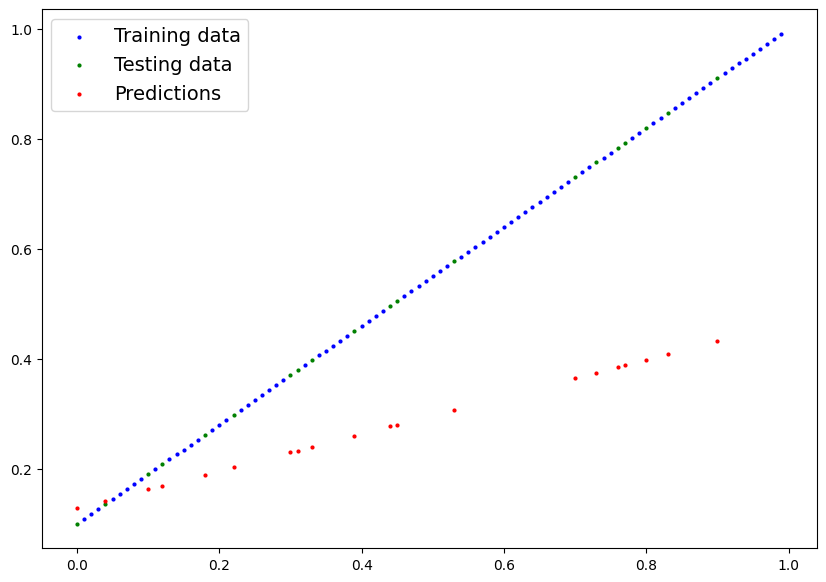

In [ ]:
plot_predictions(predictions = y_preds)

In [ ]:
#loss function
loss_fn = nn.L1Loss()

#optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [ ]:

epochs = 1000
for epoch in range(epochs):
  ##Train

  #Put the model in training mode
  model_0.train()

  #1. Do the forward pass
  y_preds = model_0(X_train)

  #2. Calculate the loss
  loss = loss_fn(y_preds, y_train)

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Loss backward
  loss.backward()

  #5. Optimizer
  optimizer.step()


  ###Testing
  #put the model in evaluation mode
  model_0.eval()

  with torch.inference_mode():

    #do the forward pass
    test_pred = model_0(X_test)

    #calculate the loss
    test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")



Epoch: 0 | MAE Train Loss: 0.06875886023044586 | MAE Test Loss: 0.07484875619411469 
Epoch: 10 | MAE Train Loss: 0.0640140175819397 | MAE Test Loss: 0.0696532279253006 
Epoch: 20 | MAE Train Loss: 0.059268999844789505 | MAE Test Loss: 0.06445766985416412 
Epoch: 30 | MAE Train Loss: 0.05452290177345276 | MAE Test Loss: 0.05926213413476944 
Epoch: 40 | MAE Train Loss: 0.0497768260538578 | MAE Test Loss: 0.05406658723950386 
Epoch: 50 | MAE Train Loss: 0.045030735433101654 | MAE Test Loss: 0.048871032893657684 
Epoch: 60 | MAE Train Loss: 0.0402846485376358 | MAE Test Loss: 0.04367548227310181 
Epoch: 70 | MAE Train Loss: 0.03553933650255203 | MAE Test Loss: 0.03841976448893547 
Epoch: 80 | MAE Train Loss: 0.030794506892561913 | MAE Test Loss: 0.033224210143089294 
Epoch: 90 | MAE Train Loss: 0.026048999279737473 | MAE Test Loss: 0.028028663247823715 
Epoch: 100 | MAE Train Loss: 0.021302904933691025 | MAE Test Loss: 0.022833112627267838 
Epoch: 110 | MAE Train Loss: 0.01655682362616062 

In [ ]:
print(model_0.state_dict())

OrderedDict({'weight': tensor([0.8926]), 'bias': tensor([0.0996])})


In [ ]:
model_0.eval()
with torch.inference_mode():
  new_preds = model_0(X_test)
new_preds

tensor([0.8404, 0.5726, 0.7244, 0.5012, 0.4923, 0.4477, 0.2959, 0.8136, 0.1888,
        0.0996, 0.2602, 0.3673, 0.7512, 0.3941, 0.9029, 0.1353, 0.7779, 0.7869,
        0.2067, 0.3763])

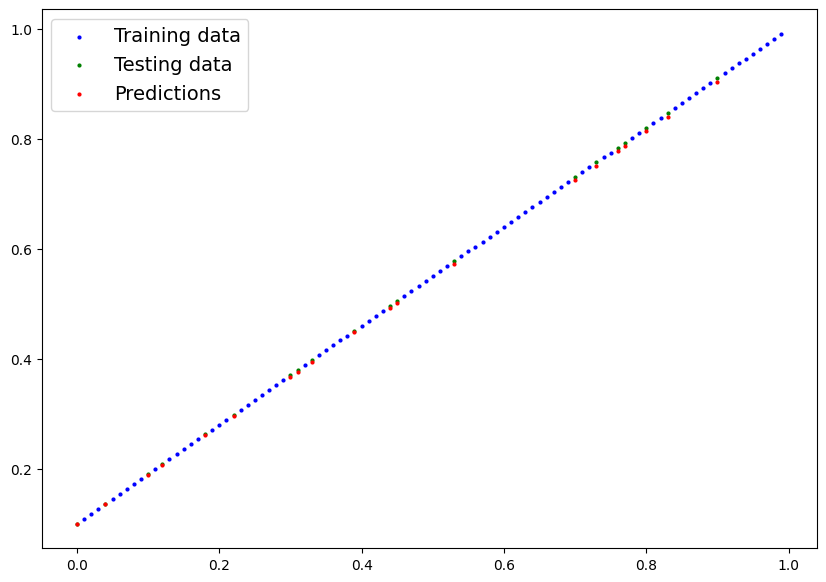

In [ ]:
plot_predictions(predictions=new_preds)